In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

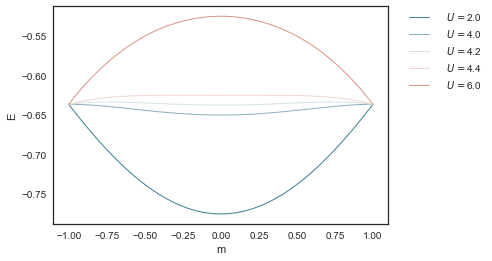

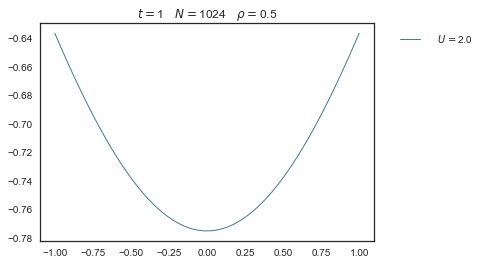

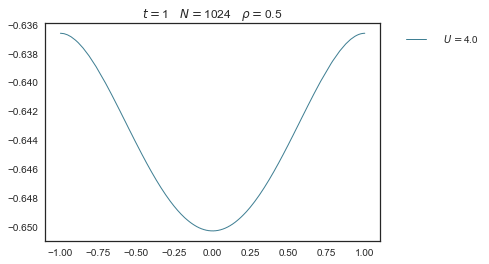

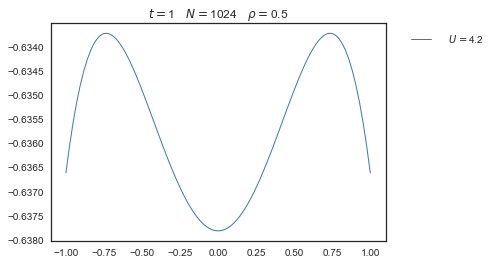

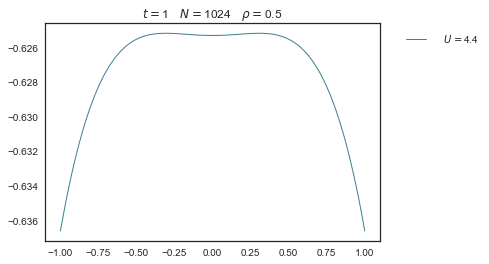

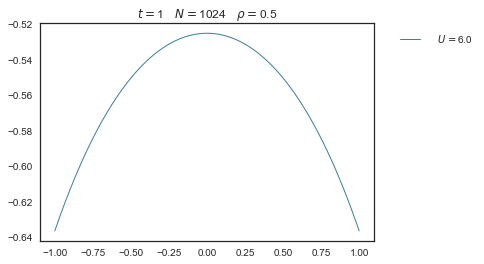

In [2]:
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))
Us = np.array([2., 4., 4.2, 4.4, 6.])

fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'm')
plt.ylabel(r'E')

for idx, U in enumerate(Us):
    N = 1024
    filling = 2 # 2 : quarter filling
    Np = int(N / filling)
    t = 1
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N

    eUp = - 2 * t * np.cos(k)
    eDown = - 2 * t * np.cos(k)

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    plt.figure(idx + 1)
    plt.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
    plt.savefig('mfHubbard' + '.png', dpi = 600)
    
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r'$t=$' + r'' + str(t) + r'$\quadN=$' \
              + r'' + str(N) + r'$\quad\rho=$' + r'' + str(1/filling))

plt.savefig('mfHubbard' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')